In [82]:
import numpy as np
import matplotlib.pyplot as plt

Using `analytical approach` to find the slope and the bias of the linear regression equation. It is suitable for small problems, as the problem gets bigger and more complicated this method will eventually get too intesive to utilize.

In [83]:
def generate_data(samples=50, noise=5):
    """
    ground truth line is y = 3 + 4x
    this function generates synthetic data
    """
    true_slope = 4
    true_intercept = 3
    true_x = np.linspace(-10 , 10, samples) 
    true_y = true_intercept + true_slope * true_x
    noise  = np.random.randn(samples) * noise
    noise_included_y = true_y + noise

    return true_x, noise_included_y


def hypothesis_w(x , w):
    """
    Linear regression basic form. It gets array of x's then computes the corresponding y's 
    based on the given weights.
    """
    return w[0] + w[1] * x


def bias_computation(w1, X, y):
    """
    In this functions the bias terms is computed using closed form. 
    A closed-form solution is an explicit mathematical expression that 
    solves a problem directly, without requiring iterative numerical methods.
    """
    samples  = len(X)
    w0 = (np.sum(y) - np.sum(X) * w1) / samples
    return w0 


def slope_computation(X, y):
    """
    Computes the slope (w1) of a simple linear regression line using
    the closed-form analytical solution:

        w1 = (n * Σ(xy) - Σx * Σy) / (n * Σ(x²) - (Σx)²)

    Parameters
    ----------
    X : numpy.ndarray
        1D or 2D array of input feature values.
    y : numpy.ndarray
        1D array of target values.

    Returns
    -------
    float
        The computed slope w1.
    """
    n  = len(X)
    numerator = n * np.sum(X * y) - np.sum(X) * np.sum(y)
    denominator = n * np.sum(X ** 2) - (np.sum(X) ** 2)   
    return numerator / denominator

In [84]:
# dummy data to perform experiment using the functions created earlier
x, y = generate_data(100, 5)
slope = slope_computation(x, y)
bias = bias_computation(slope, x, y)
print(f"Bias computed as: {bias}\nSlope computed as: {slope}")

Bias computed as: 2.773409519514603
Slope computed as: 4.125683389885744


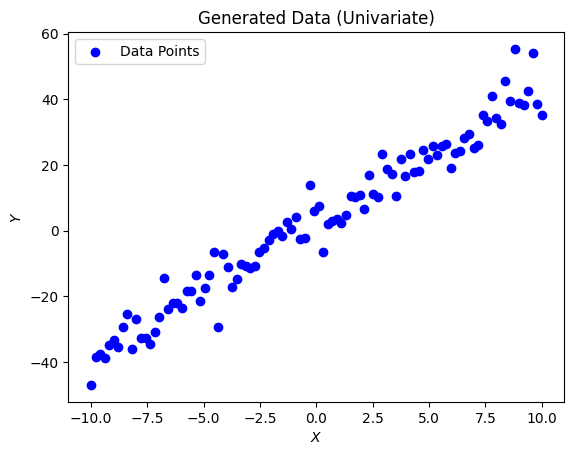

In [85]:
plt.scatter(x, y , c='blue', label='Data Points')
plt.xlabel("$X$")
plt.title("Generated Data (Univariate)")
plt.ylabel("$Y$")
plt.legend()
plt.show()